rundir /m12m_mass56000/mhdcv/
loading file : /home/tkc004//oasis/philruns///m12m_mass56000/mhdcv///output//snapdir_600/snapshot_600.0.hdf5
npart_file:  [1646993 2216968  619551       0  501900       0]
npart_total: [13523533 17621672  4399020        0  4201730        0]
flag_cooling 1
this time 1.0
hubble 0.702
atime 1.0
loading file : /home/tkc004//oasis/philruns///m12m_mass56000/mhdcv///output//snapdir_600/snapshot_600.0.hdf5
npart_file:  [1646993 2216968  619551       0  501900       0]
npart_total: [13523533 17621672  4399020        0  4201730        0]
flag_cooling 1
xvcen, yvcen, zvcen -180.42 -6.52 140.31
rundir /m12m_mass56000/mhdcv/
Gvx,Gvy,Gvz 55.87870197680843 -14.392306633542972 -106.28753192944936
11.2839978634 0.423523028942 33147126981.123207
11.28399786342254 0.4235230289418157 33147126981.123207
11.28399786342254 0.4235230289418157 33147126981.123207
11.28399786342254 0.4235230289418157 33147126981.123207
11.283998031567211 0.4235230289418157 33147126981.123207
11.2839

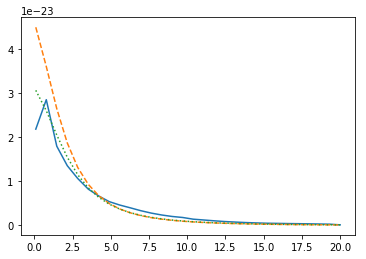

In [2]:
from samson_functions import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.optimize as opt



runtodo = 'm12mmhdcv'
Nsnap=600
ptype=0

G=readsnapfromrun(runtodo,Nsnap,ptype,rotface=1,loccen=1)

rmax=20.; zmax=3.; nogrid=30

fitdata = fitMNpot(G, rmax=rmax,zmax=zmax,nogrid=nogrid)

rho_real = fitdata['rhoreal']
rho_ana = fitdata['rhoana']
rho_fit = fitdata['rhofit']
rlist = fitdata['rlist']

rhom_real=rho_real.reshape(nogrid,nogrid)
rhom_ana=rho_ana.reshape(nogrid,nogrid)
rhom_fit=rho_fit.reshape(nogrid,nogrid)

rhosum_real = rhom_real.sum(axis=1)
rhosum_ana = rhom_ana.sum(axis=1)
rhosum_fit = rhom_fit.sum(axis=1)

plt.plot(rlist,rhosum_real)
plt.plot(rlist,rhosum_ana,ls='dashed')
plt.plot(rlist,rhosum_fit,ls='dotted')

#print 'Error ana', np.sum(np.square(rho_real-rho_ana))
#print 'Error fit', np.sum(np.square(rho_real-rho_fit))
'''
fig, ax = plt.subplots(3,1);

ax[0].pcolor(rl, zl, rhom_real, cmap=cm.RdYlGn,
             vmin=abs(rho_real).min(), vmax=abs(rho_real).max());

ax[1].pcolor(rl, zl, rhom_ana, cmap=cm.RdYlGn,
             vmin=abs(rho_real).min(), vmax=abs(rho_real).max());

ax[2].pcolor(rl, zl, rhom_fit, cmap=cm.RdYlGn,
             vmin=abs(rho_real).min(), vmax=abs(rho_real).max());

'''

plt.gcf().canvas.draw()
plt.show();

